<a href="https://colab.research.google.com/github/Himanshukunar/excelr-assignments/blob/main/Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
xls = pd.ExcelFile("/content/glass.xlsx")
print(xls.sheet_names)
df = xls.parse("glass", header=1)
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.quantile([0.01, 0.99]))

['Description', 'glass']
(213, 10)
   1.52101  13.64  4.49   1.1  71.78  0.06  8.75    0   0.1  1
0  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00  1
1  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00  1
2  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00  1
3  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00  1
4  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26  1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1.52101  213 non-null    float64
 1   13.64    213 non-null    float64
 2   4.49     213 non-null    float64
 3   1.1      213 non-null    float64
 4   71.78    213 non-null    float64
 5   0.06     213 non-null    float64
 6   8.75     213 non-null    float64
 7   0        213 non-null    float64
 8   0.1      213 non-null    float64
 9   1        213 non-null    int64  
dtypes: float64(9), int64(

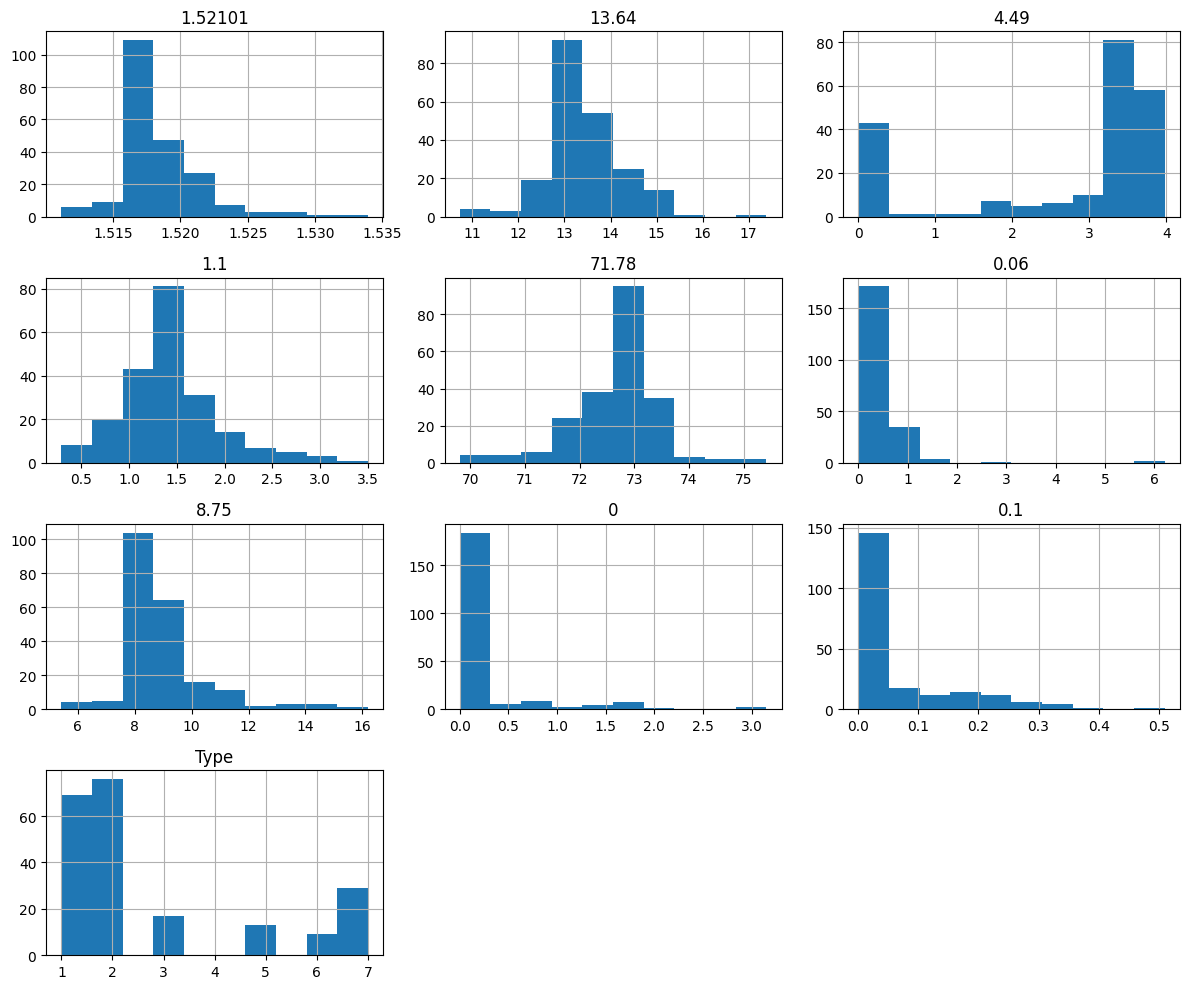

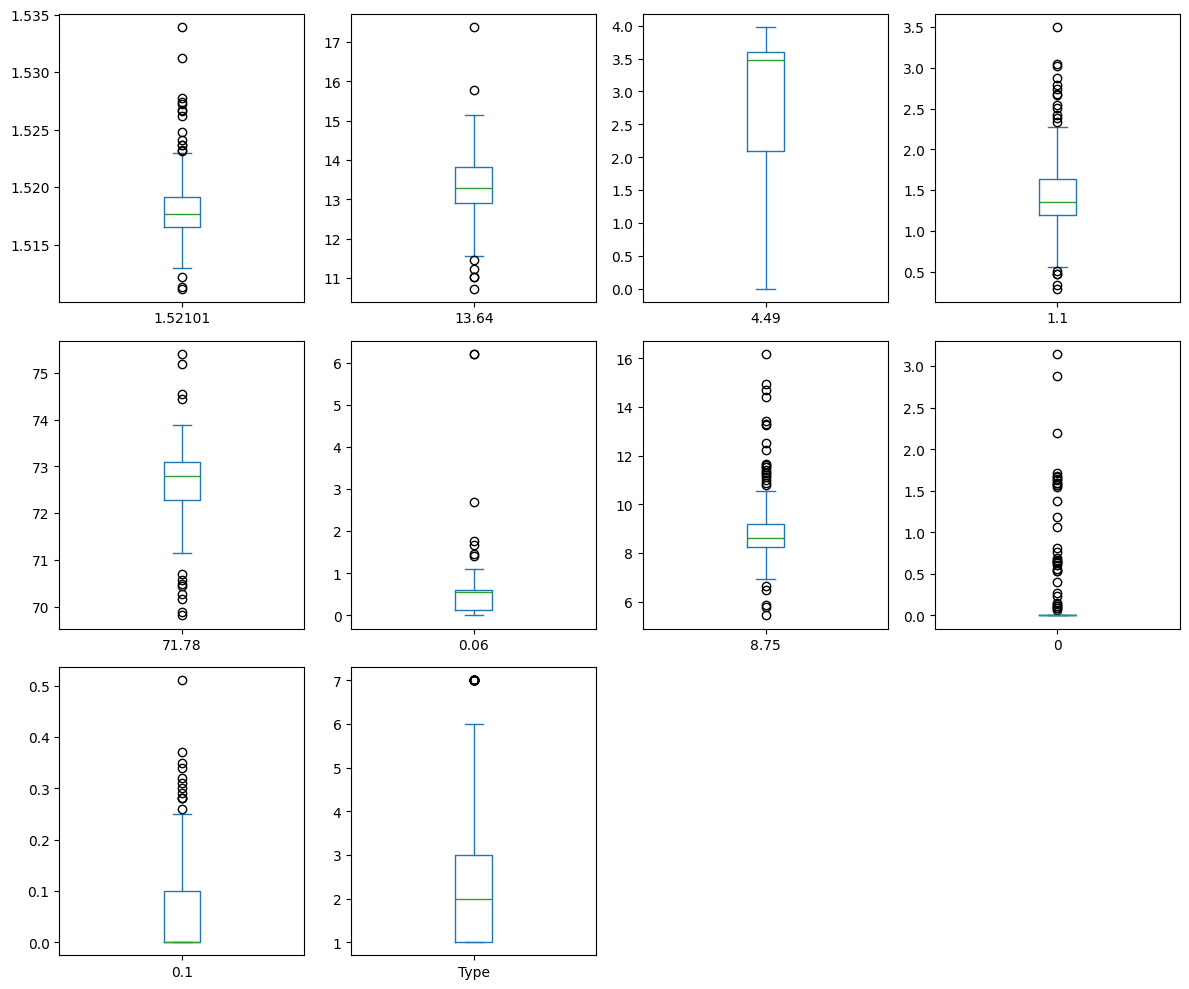

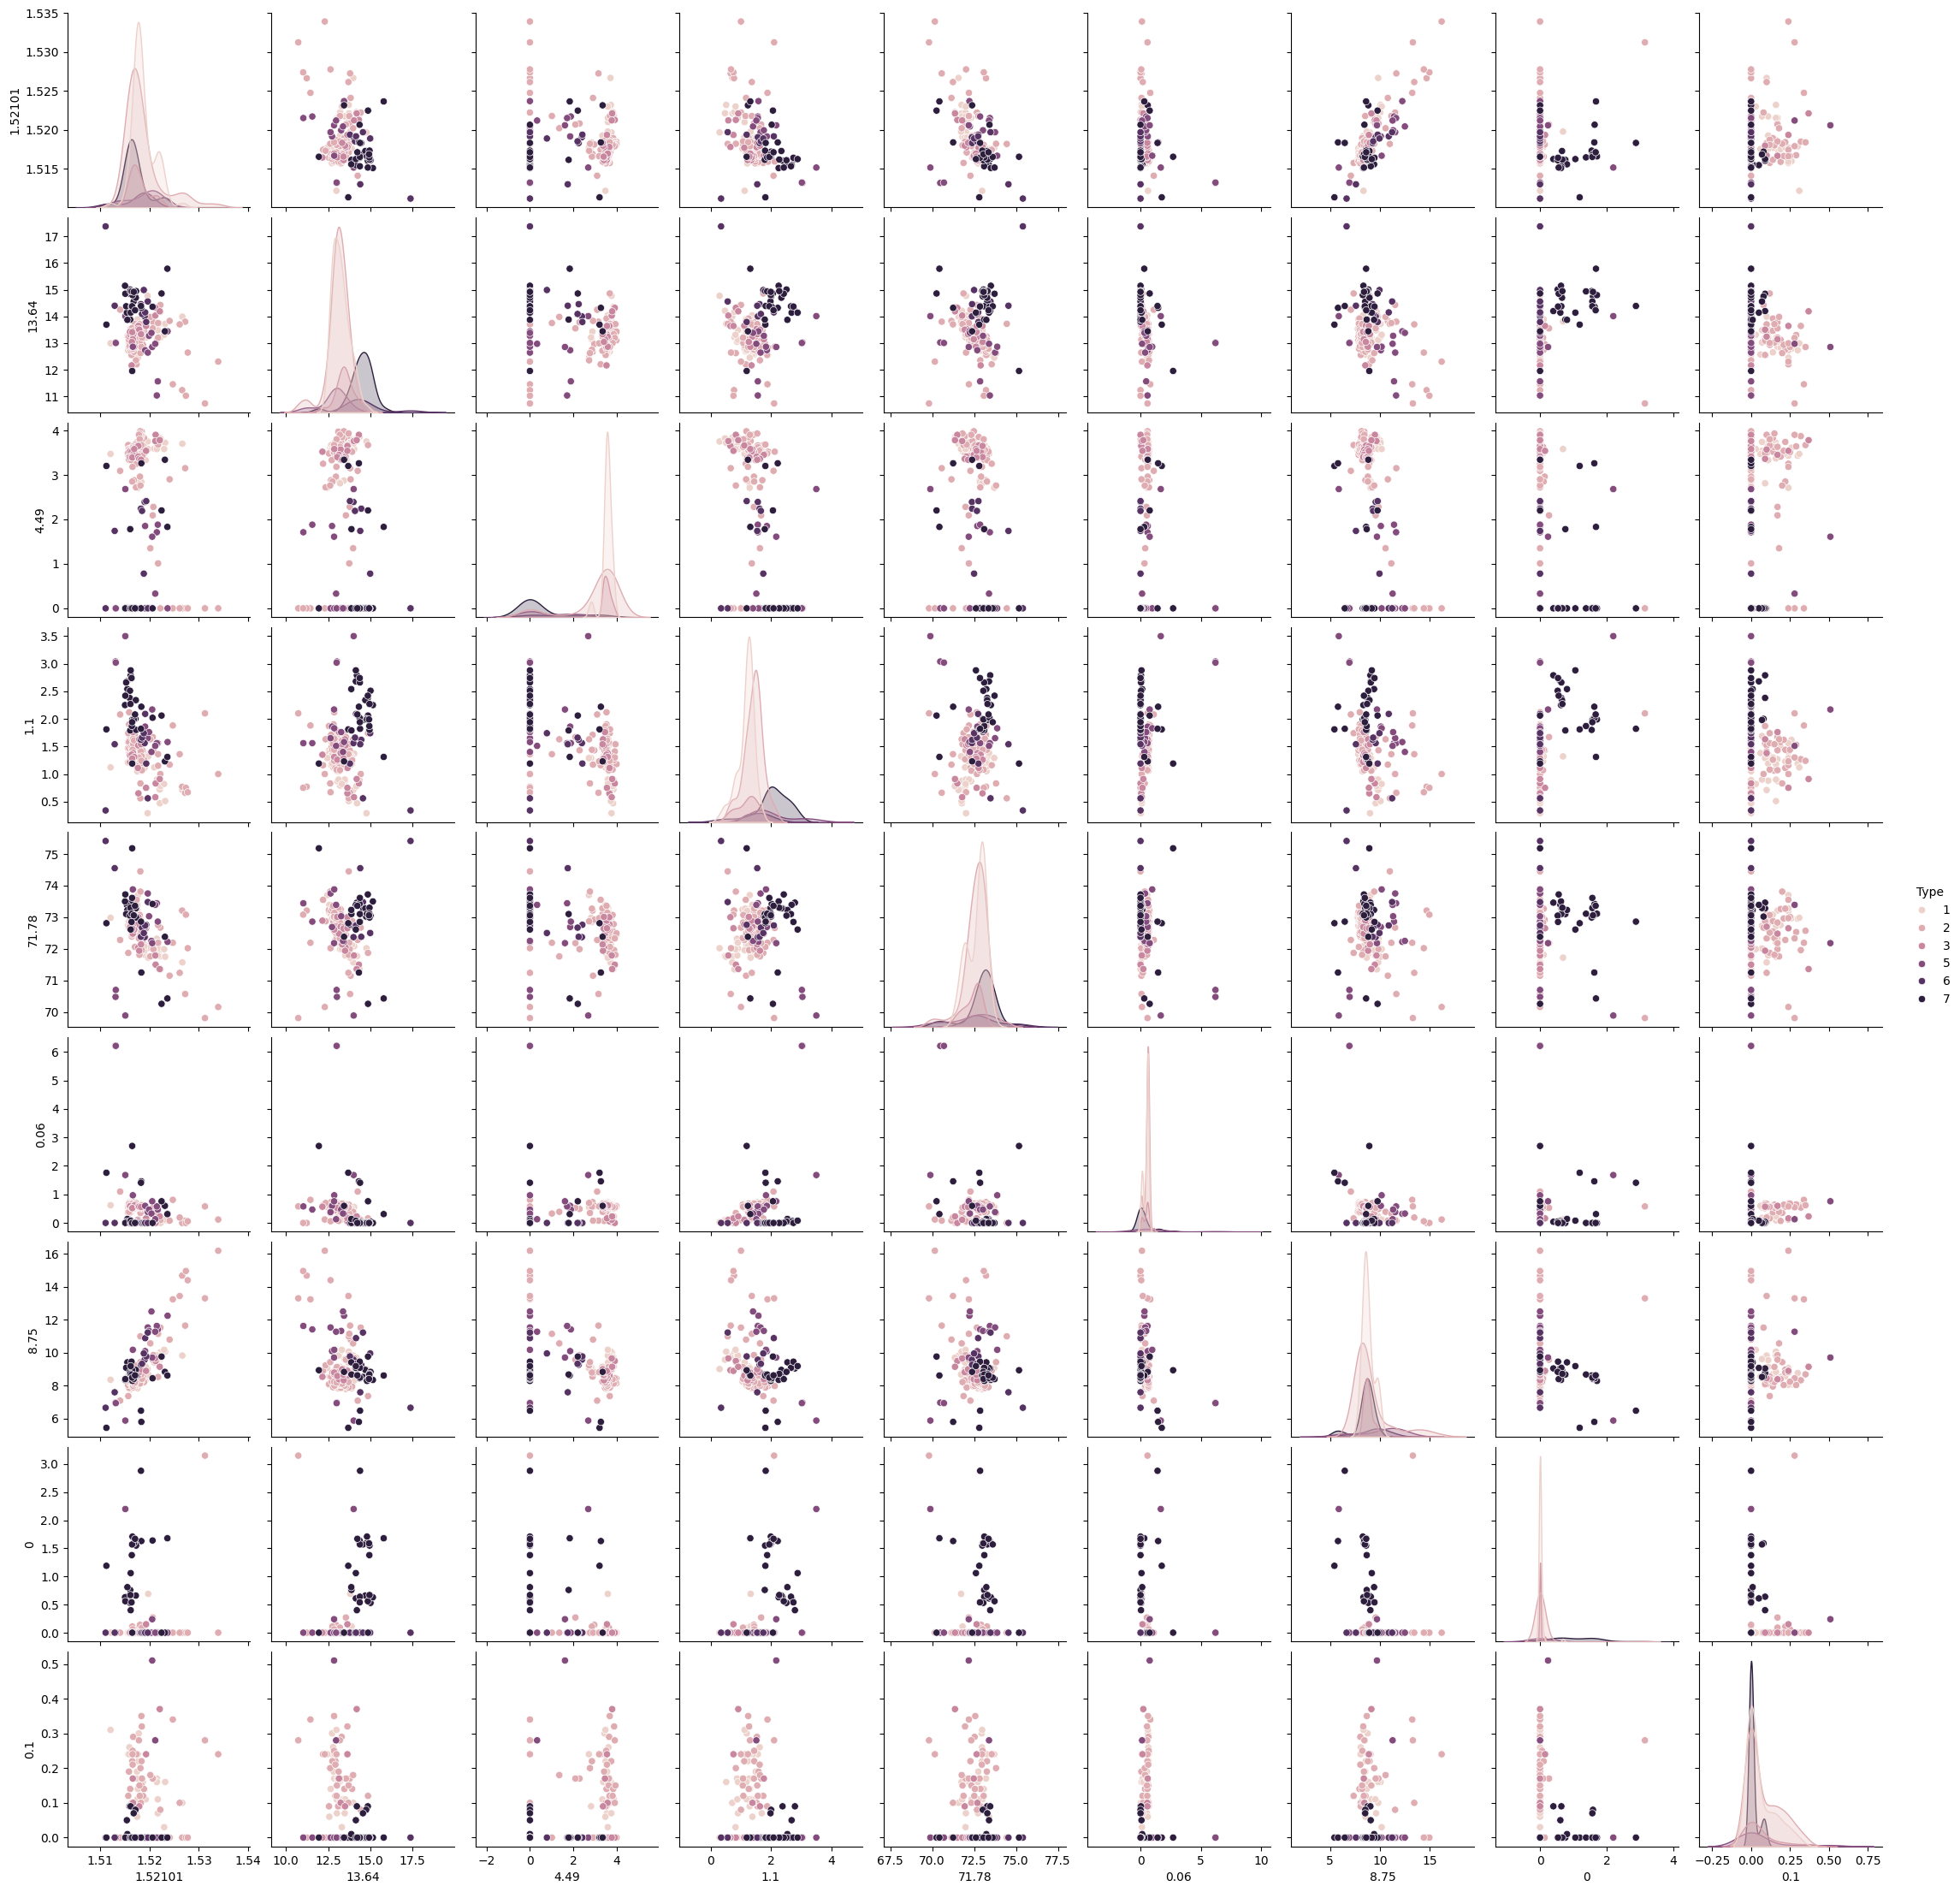

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df.rename(columns={df.columns[-1]: 'Type'})
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()
df.plot(kind='box', subplots=True, layout=(3,4), figsize=(12,10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()
sns.pairplot(df, hue="Type")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
df.fillna(df.median(), inplace=True)
df.columns = df.columns.astype(str)
features = df.drop(columns=["Type"]).columns
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

print(df.head())

    1.52101     13.64      4.49       1.1     71.78      0.06      8.75  \
0 -0.245101  0.591880  0.642937 -0.173500  0.097091 -0.029329 -0.792599   
1 -0.716826  0.150946  0.608144  0.187433  0.433777 -0.167472 -0.827734   
2 -0.228607 -0.240996  0.705564 -0.313863 -0.058303  0.108813 -0.518546   
3 -0.307777 -0.167507  0.656854 -0.414122  0.550322  0.078115 -0.623951   
4 -0.789399 -0.755419  0.649895  0.347848  0.407878  0.216258 -0.623951   

          0       0.1  Type  
0 -0.353808 -0.588301     1  
1 -0.353808 -0.588301     1  
2 -0.353808 -0.588301     1  
3 -0.353808 -0.588301     1  
4 -0.353808  2.082200     1  


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = df.drop("Type", axis=1)
y = df["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy: 0.8604651162790697
Precision: 0.8679955703211515
Recall: 0.8604651162790697
F1 Score: 0.859663191659984
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.86      0.80      0.83        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.86        43
   macro avg       0.84      0.84      0.83        43
weighted avg       0.87      0.86      0.86        43



In [12]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
bagging = BaggingClassifier(RandomForestClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_bag = bagging.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_bag))
boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting.fit(X_train, y_train)
y_boost = boosting.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, y_boost))


Bagging Accuracy: 0.813953488372093
Boosting Accuracy: 0.5348837209302325


In [ ]:
1. Bagging vs Boosting
Bagging: Builds models in parallel on bootstrapped samples; reduces variance; e.g., Random Forest.
Boosting: Builds models sequentially, each focusing on previous errors; reduces bias; e.g., AdaBoost, XGBoost.
Difference: Bagging → parallel & variance reduction; Boosting → sequential & bias reduction.

In [ ]:
2. Handling Imbalanced Data
Resampling: Oversampling (SMOTE), undersampling, or hybrid.
Algorithm-level: Use class weights or algorithms like XGBoost, Random Forest.
Metrics: Use Precision, Recall, F1-score, ROC-AUC instead of accuracy.
Data-level: Collect more minority data if possible.